# Import MNIST images

Description of MNIST formats obtained at http://yann.lecun.com/exdb/mnist/

## Defining functions

In [1]:
def import_mnist_images(filename):
    import struct
    import numpy as np

    struct_header_fmt    = '>4i' # int[4]
    struct_header_len    = struct.calcsize(struct_header_fmt)
    struct_header_unpack = struct.Struct(struct_header_fmt).unpack_from

    struct_data_fmt    = '>784B' # unsigned byte[28x28] per image
    struct_data_len    = struct.calcsize(struct_data_fmt)
    struct_data_unpack = struct.Struct(struct_data_fmt).unpack_from

    pixels = []
    with open(filename, "rb") as f:
        header = f.read(struct_header_len)
        # header is not saved
        while True:
            data = f.read(struct_data_len)
            if not data: break # read until EOF
            s = struct_data_unpack(data)
            pixels.append(s)
    return np.array(pixels)

def import_mnist_labels(filename):
    import struct
    import numpy as np
    
    struct_header_fmt    = '>2i' # int[4]
    struct_header_len    = struct.calcsize(struct_header_fmt)
    struct_header_unpack = struct.Struct(struct_header_fmt).unpack_from

    struct_data_fmt    = '>B' # unsigned byte
    struct_data_len    = struct.calcsize(struct_data_fmt)
    struct_data_unpack = struct.Struct(struct_data_fmt).unpack_from

    labels = []
    with open(filename, "rb") as f:
        header = f.read(struct_header_len)
        # header is not saved
        while True:
            data = f.read(struct_data_len)
            if not data: break # read until EOF
            s = struct_data_unpack(data)
            labels.append(s)
    return np.array(labels)

def display_mnist_image(pixels, label):
    import matplotlib.pyplot as plt
    
    pixels = pixels.reshape(28,28)
    plt.imshow(pixels, cmap='binary')
    plt.title('Expected Character: ' + str(label))
    plt.show()

## Importing train files

Train images matrix shape: (60000, 784)
Train labels matrix shape: (60000, 1)


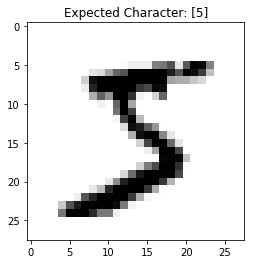

In [2]:
train_images_file = './datasets/train-images-idx3-ubyte'
train_labels_file = './datasets/train-labels-idx1-ubyte'

train_images = import_mnist_images(train_images_file)
train_labels = import_mnist_labels(train_labels_file)

print('Train images matrix shape: ' + str(train_images.shape))
print('Train labels matrix shape: ' + str(train_labels.shape))
display_mnist_image(train_images[0],train_labels[0])

## Importing test files

In [3]:
test_images_file = './datasets/t10k-images-idx3-ubyte'
test_labels_file = './datasets/t10k-labels-idx1-ubyte'

test_images = import_mnist_images(test_images_file)
test_labels = import_mnist_labels(test_labels_file)

print('Test images matrix shape: ' + str(test_images.shape))
print('Test labels matrix shape: ' + str(test_labels.shape))

Test images matrix shape: (10000, 784)
Test labels matrix shape: (10000, 1)


# Training regression

In [7]:
# Logistic Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
X = test_images
y = test_labels

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# y to array of binaries
#from sklearn import preprocessing
#lb = preprocessing.LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)
#y_train = lb.fit_transform(y_train)
#y_test  = lb.fit_transform(y_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver = 'lbfgs')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy was 87.36%


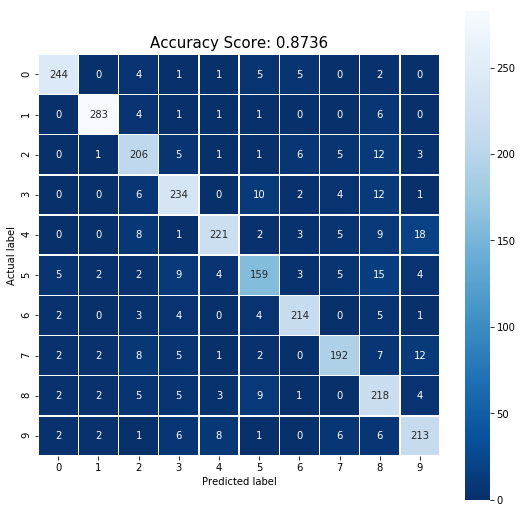

In [16]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print('The accuracy was %s%%' % (score*100))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#print(cm)

import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()